<a href="https://colab.research.google.com/github/Ujanghost/KMC/blob/main/kmc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

# Read the WhatsApp text data
with open('/content/WhatsApp Messages.txt', 'r') as file:
    lines = file.readlines()

# Parse the lines and create a structured DataFrame
data = []
for line in lines:
    parts = line.split(']', 1)
    if len(parts) == 2:
        date_time = parts[0].strip('[')
        message = parts[1].split(':', 1)
        if len(message) == 2:
            author = message[0].strip()
            text = message[1].strip()
            data.append([date_time, author, text])

# Create a DataFrame
df = pd.DataFrame(data, columns=['DateTime', 'Author', 'Message'])

# Save the DataFrame to a CSV file
df.to_csv('whatsapp.csv', index=False)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


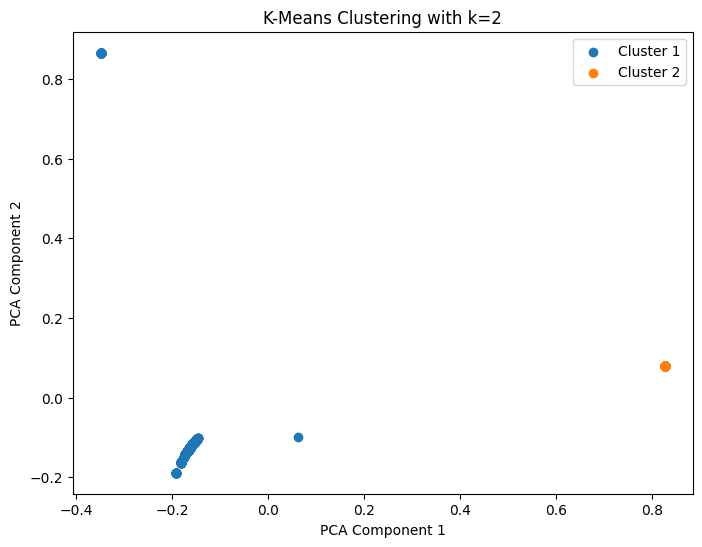

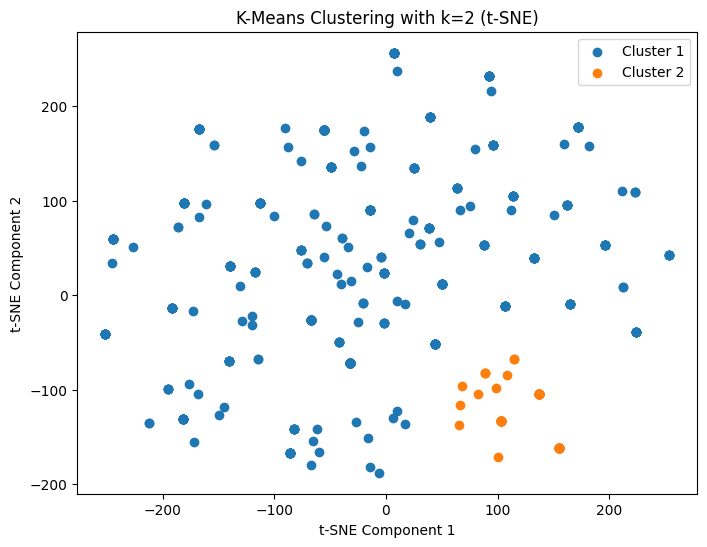


Cluster 1 Analysis:
Message
Sleeping      65
Travelling    27
Cooking       22
Talking       21
Trekking      16
Name: count, dtype: int64

Cluster 2 Analysis:
Message
Eating    132
Name: count, dtype: int64


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


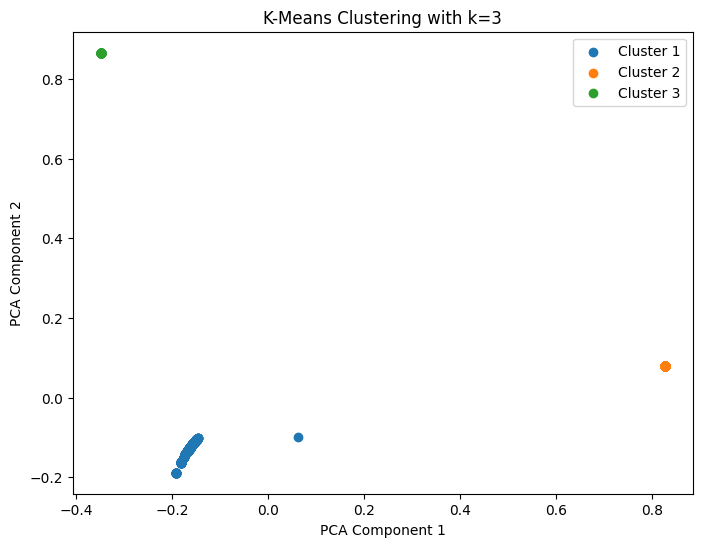

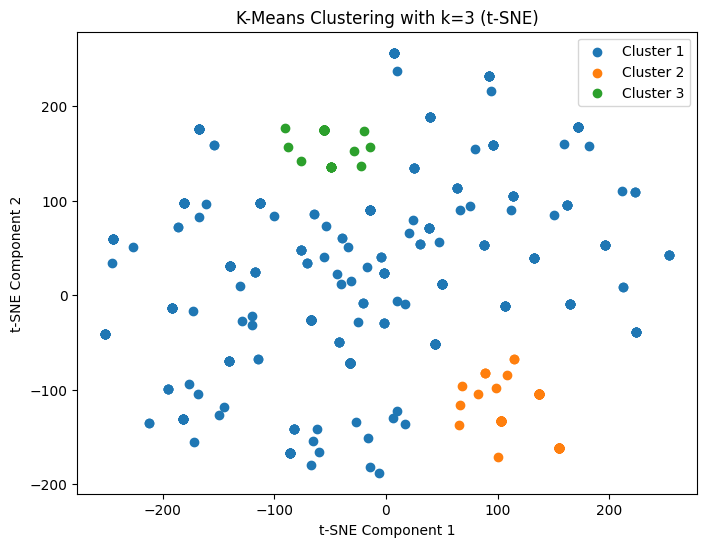


Cluster 1 Analysis:
Message
Travelling    27
Cooking       22
Talking       21
Trekking      16
Playing       15
Name: count, dtype: int64

Cluster 2 Analysis:
Message
Eating    132
Name: count, dtype: int64

Cluster 3 Analysis:
Message
Sleeping    65
Name: count, dtype: int64


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


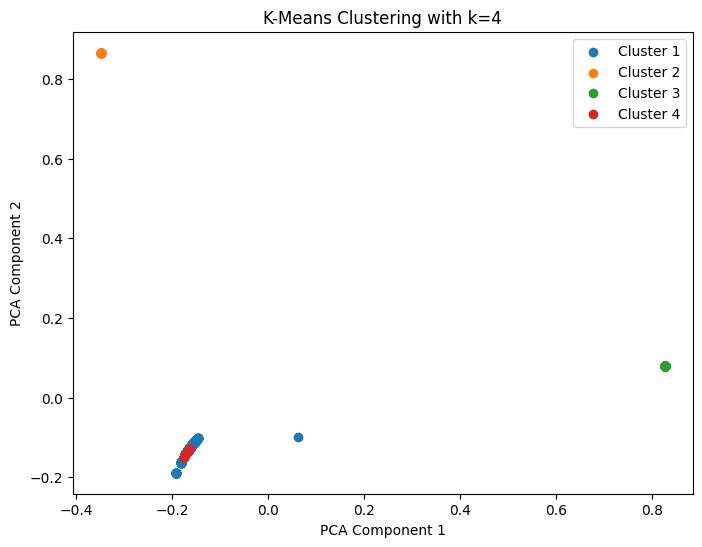

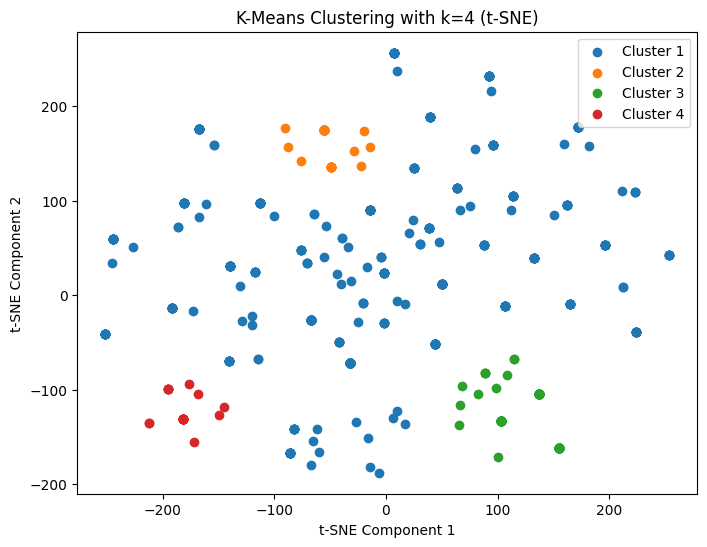


Cluster 1 Analysis:
Message
Travelling    27
Cooking       22
Talking       21
Trekking      16
Playing       15
Name: count, dtype: int64

Cluster 2 Analysis:
Message
Sleeping    65
Name: count, dtype: int64

Cluster 3 Analysis:
Message
Eating    132
Name: count, dtype: int64

Cluster 4 Analysis:
Message
Watching                      13
Watching movies                4
Watching anime                 2
Watching Movies and Series     1
Watching series                1
Name: count, dtype: int64


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


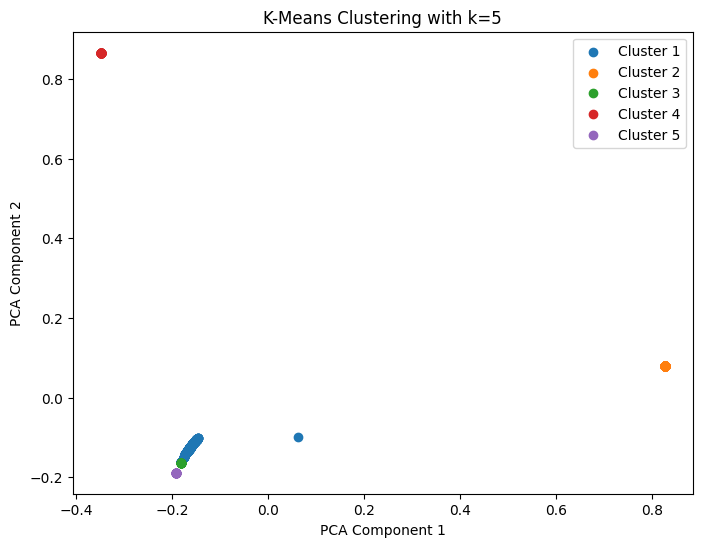

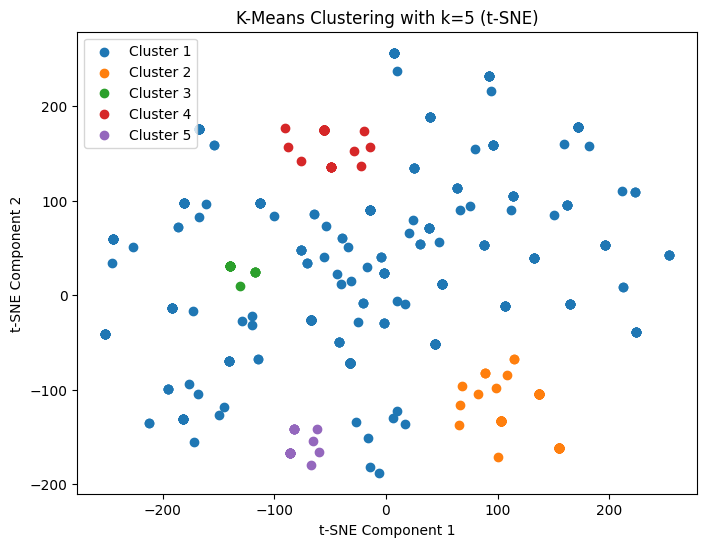


Cluster 1 Analysis:
Message
Talking      21
Trekking     16
Playing      15
Dancing      14
Traveling    13
Name: count, dtype: int64

Cluster 2 Analysis:
Message
Eating    132
Name: count, dtype: int64

Cluster 3 Analysis:
Message
Cooking    22
Name: count, dtype: int64

Cluster 4 Analysis:
Message
Sleeping    65
Name: count, dtype: int64

Cluster 5 Analysis:
Message
Travelling    27
Name: count, dtype: int64


In [2]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# Load the CSV file
df = pd.read_csv('/content/whatsapp.csv')

# Extract the messages
messages = df['Message'].tolist()

# Convert text data to TF-IDF features
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(messages)

# Function to perform K-Means clustering and visualize the results
def kmeans_clustering(X, k):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    labels = kmeans.labels_

    # Visualize the clusters using PCA
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X.toarray())

    plt.figure(figsize=(8, 6))
    for i in range(k):
        plt.scatter(X_pca[labels == i, 0], X_pca[labels == i, 1], label=f'Cluster {i+1}')
    plt.title(f'K-Means Clustering with k={k}')
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    plt.legend()
    plt.show()

    # Visualize the clusters using t-SNE
    tsne = TSNE(n_components=2, random_state=42)
    X_tsne = tsne.fit_transform(X.toarray())

    plt.figure(figsize=(8, 6))
    for i in range(k):
        plt.scatter(X_tsne[labels == i, 0], X_tsne[labels == i, 1], label=f'Cluster {i+1}')
    plt.title(f'K-Means Clustering with k={k} (t-SNE)')
    plt.xlabel('t-SNE Component 1')
    plt.ylabel('t-SNE Component 2')
    plt.legend()
    plt.show()

    # Print the cluster analysis
    df['Cluster'] = labels
    for i in range(k):
        print(f'\nCluster {i+1} Analysis:')
        cluster_messages = df[df['Cluster'] == i]['Message']
        print(cluster_messages.value_counts().head())

# Apply K-Means clustering and visualize results for k=2 to k=5
for k in range(2, 6):
    kmeans_clustering(X, k)
